### Loading our libraries 

In [1]:
#Importing Regular Expressions module 
import re

# Importing numpy 
import numpy as np

# ....... Pandas 
import pandas as pd

# ........ Tensorflow 
import tensorflow as tf
# ......... Matplotlib 
import matplotlib.pyplot as plt

# ..........Pandas 
import pandas as pd

# Importing train test split from Sklearn 
from sklearn.model_selection import train_test_split

import os

# load the libraries
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import cv2
from tqdm import tqdm

from PIL import Image

import sys
import csv


2022-01-17 20:16:46.046316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 20:16:46.046405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Data Loading

In [2]:
DATADIR = "/home/francis/Downloads/Compressed/ballot/mark recognition/marks"


CATEGORIES = ['cross', 'ticks']



In [3]:
#Useful function
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)

    for root, dirs, files in os.walk(myDir, topdown=False):

        for name in files:

            if name.endswith(format):

                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList




### Visualize the data 

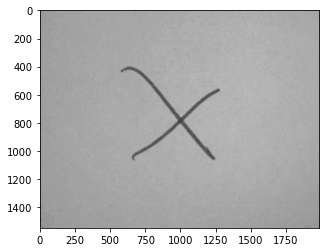

In [4]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img)) 
        plt.imshow(img_array, cmap='gray') 
        plt.show() 
        break
    break    

In [5]:
print(img_array)

[[[155 155 155]
  [154 154 154]
  [153 153 153]
  ...
  [165 165 165]
  [167 167 167]
  [167 167 167]]

 [[155 155 155]
  [153 153 153]
  [152 152 152]
  ...
  [165 165 165]
  [165 165 165]
  [165 165 165]]

 [[154 154 154]
  [152 152 152]
  [152 152 152]
  ...
  [165 165 165]
  [165 165 165]
  [165 165 165]]

 ...

 [[148 148 148]
  [146 146 146]
  [146 146 146]
  ...
  [149 149 149]
  [149 149 149]
  [147 147 147]]

 [[148 148 148]
  [148 148 148]
  [148 148 148]
  ...
  [146 146 146]
  [149 149 149]
  [146 146 146]]

 [[148 148 148]
  [148 148 148]
  [148 148 148]
  ...
  [146 146 146]
  [149 149 149]
  [146 146 146]]]


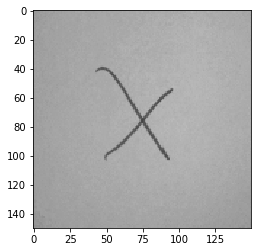

In [6]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

### Building our training data!

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
            
create_training_data()

print(len(training_data))

              

100%|██████████| 62/62 [00:01<00:00, 31.90it/s]

132


### Shuffling our data 

Next, we want to shuffle the data. Right now our data is just all pneumonia, then normal and covid. This will usually end up causing trouble as, initially, the classifier will learn to just predict  pneumonia, normal and covid

In [8]:
import random

random.shuffle(training_data)

### Viewing  the shaffled data.

In [9]:
for sample in training_data[:100]:
    print(sample[1])

1
0
1
0
1
1
0
0
0
0
1
0
1
1
1
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0


### Making our model 

In [10]:
X=[]
y=[]

In [11]:

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[ 93]
   [ 93]
   [ 97]
   ...
   [103]
   [105]
   [103]]

  [[101]
   [ 99]
   [ 99]
   ...
   [102]
   [105]
   [106]]

  [[ 98]
   [ 94]
   [ 96]
   ...
   [110]
   [107]
   [110]]

  ...

  [[150]
   [151]
   [153]
   ...
   [169]
   [170]
   [167]]

  [[146]
   [149]
   [148]
   ...
   [169]
   [166]
   [166]]

  [[151]
   [150]
   [150]
   ...
   [170]
   [167]
   [169]]]]


In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Loading our current scripts 

### Making the predictions 

In [13]:
# Loading the libraries 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [14]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Conv2D(256, (3, 3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

            model.add(Dense(64))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            model.fit(X, y, batch_size=32, epochs=15, validation_split=0.3)
model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1642439865


2022-01-17 20:17:46.004943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-17 20:17:46.005008: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-17 20:17:46.005061: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (francis): /proc/driver/nvidia/version does not exist
2022-01-17 20:17:46.005434: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-17 20:17:46.641517: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimi

Epoch 1/15


2022-01-17 20:17:47.875612: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 717750272 exceeds 10% of free system memory.
2022-01-17 20:17:56.576337: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 358875136 exceeds 10% of free system memory.
2022-01-17 20:17:56.576679: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 717750272 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 29s - loss: 0.6932 - accuracy: 0.5312

2022-01-17 20:18:01.237154: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 717750272 exceeds 10% of free system memory.
2022-01-17 20:18:08.340007: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 358875136 exceeds 10% of free system memory.


3/3 [==============================] - 37s 11s/step - loss: 10.8487 - accuracy: 0.5761 - val_loss: 6.9463 - val_accuracy: 0.5250
Epoch 2/15
3/3 [==============================] - 32s 11s/step - loss: 3.7735 - accuracy: 0.4457 - val_loss: 0.6825 - val_accuracy: 0.5250
Epoch 3/15
3/3 [==============================] - 32s 11s/step - loss: 0.6397 - accuracy: 0.5870 - val_loss: 0.6733 - val_accuracy: 0.4750
Epoch 4/15
3/3 [==============================] - 37s 11s/step - loss: 0.6079 - accuracy: 0.6630 - val_loss: 0.6357 - val_accuracy: 0.5500
Epoch 5/15
3/3 [==============================] - 32s 11s/step - loss: 1.0925 - accuracy: 0.6957 - val_loss: 1.2667 - val_accuracy: 0.5500
Epoch 6/15
3/3 [==============================] - 32s 11s/step - loss: 1.1005 - accuracy: 0.4674 - val_loss: 0.7968 - val_accuracy: 0.4750
Epoch 7/15
3/3 [==============================] - 32s 11s/step - loss: 0.6408 - accuracy: 0.5109 - val_loss: 0.5618 - val_accuracy: 0.8000
Epoch 8/15
3/3 [=====================

2022-01-17 20:26:13.736852: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


In [ ]:
model = tf.keras.models.load_model("64x3-CNN.model")
# predict the class
result = model.predict('mark recognition/marks/ticks/IMG_20220116_234543 (copy).jpg')

In [31]:

def prepare(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('mark recognition/Check_mark_23x20_04.svg.png')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[0.]
 [1.]
 [0.]]
cross


### Final Predictions 